In [34]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,  r2_score

In [4]:
data = pd.read_csv('food_wastage_data.csv')


In [5]:
# Explore the Dataset
print(data.head())
print(data.info())
print(data.describe())

  Type of Food  Number of Guests Event Type  Quantity of Food  \
0         Meat               310  Corporate               450   
1         Meat               400   Birthday               500   
2   Vegetables               302   Birthday               371   
3         Meat               491   Birthday               497   
4         Meat               300  Corporate               400   

  Storage Conditions Purchase History  Seasonality Preparation Method  \
0       Refrigerated          Regular  All Seasons             Buffet   
1   Room Temperature          Regular       Winter             Buffet   
2       Refrigerated          Regular       Summer             Buffet   
3       Refrigerated          Regular  All Seasons        Finger Food   
4       Refrigerated          Regular       Winter        Finger Food   

  Geographical Location   Pricing  Wastage Food Amount  
0                 Urban       Low                   25  
1              Suburban      High                   40  

In [6]:
print(data.isnull().sum())


Type of Food             0
Number of Guests         0
Event Type               0
Quantity of Food         0
Storage Conditions       0
Purchase History         0
Seasonality              0
Preparation Method       0
Geographical Location    0
Pricing                  0
Wastage Food Amount      0
dtype: int64


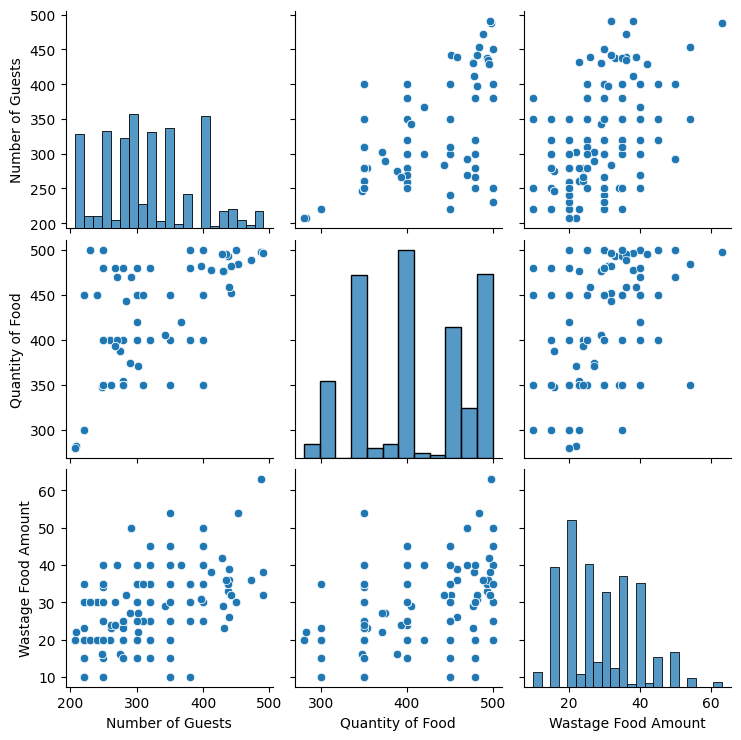

In [7]:
# Visualize the data
sns.pairplot(data)
plt.show()

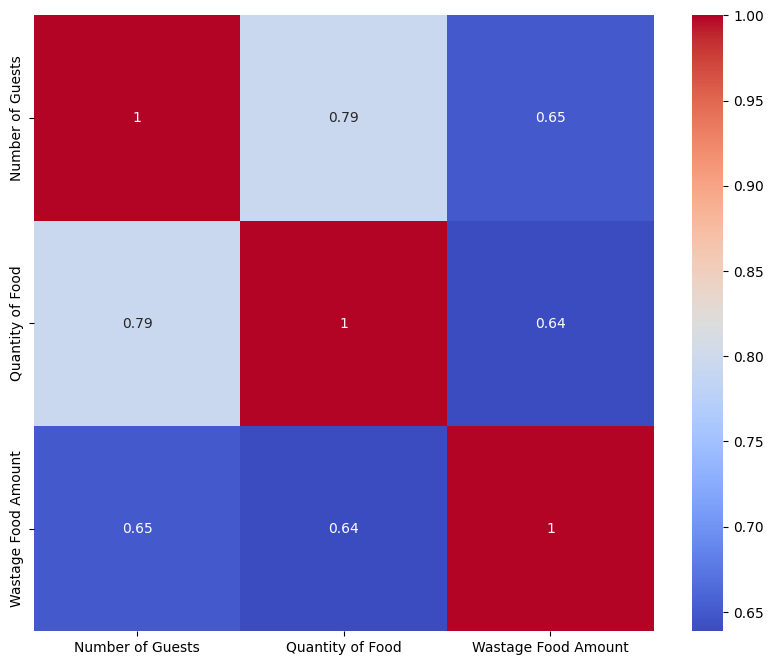

In [9]:
# Correlation matrix for numerical columns only
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

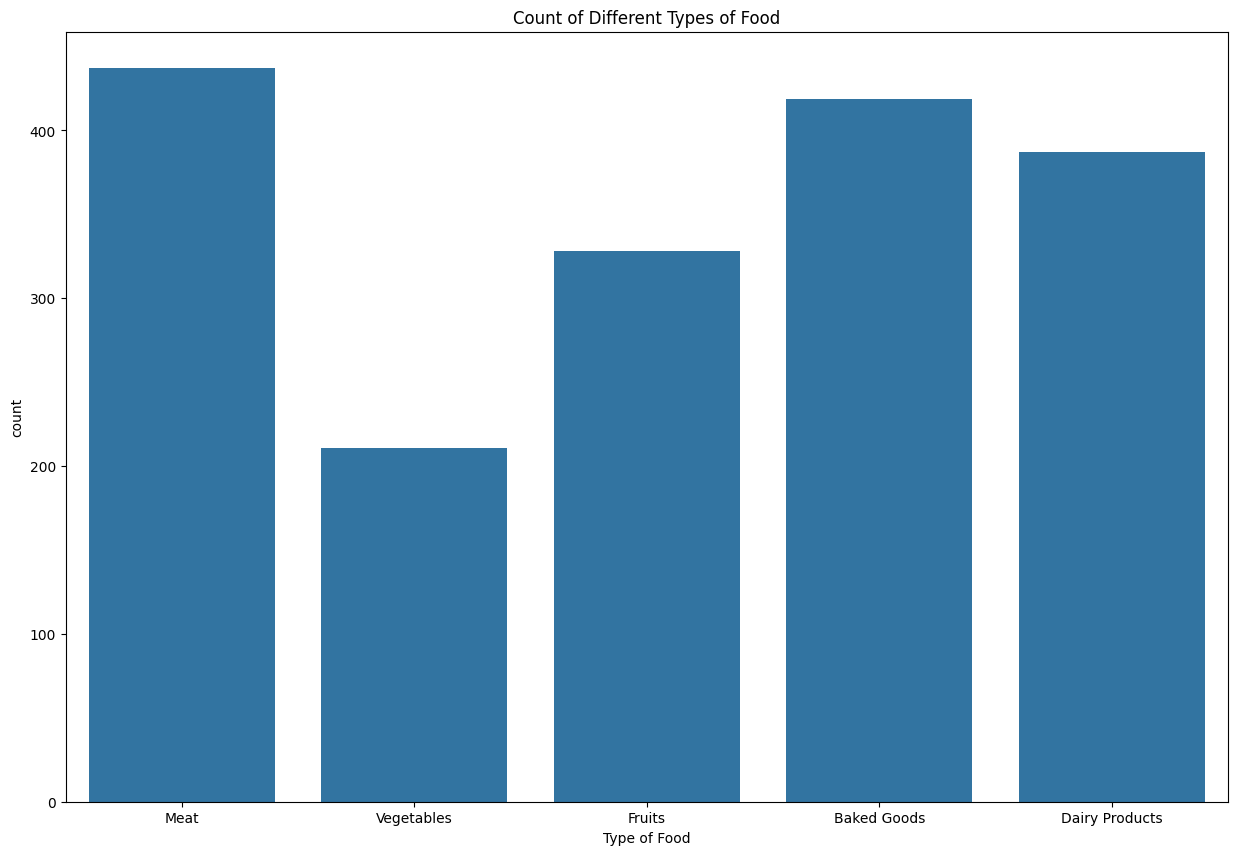

In [10]:
# Visualize categorical attributes
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='Type of Food')
plt.title('Count of Different Types of Food')
plt.show()


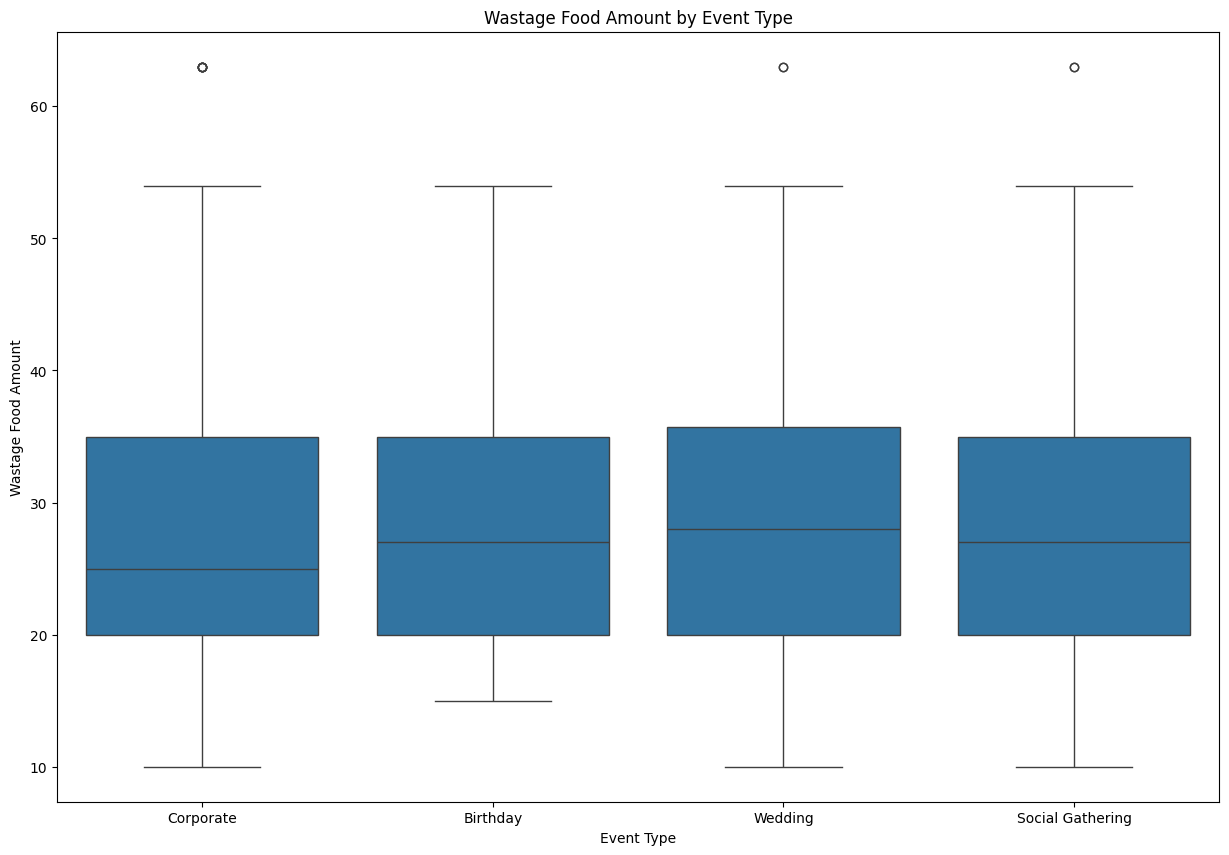

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Event Type', y='Wastage Food Amount')
plt.title('Wastage Food Amount by Event Type')
plt.show()

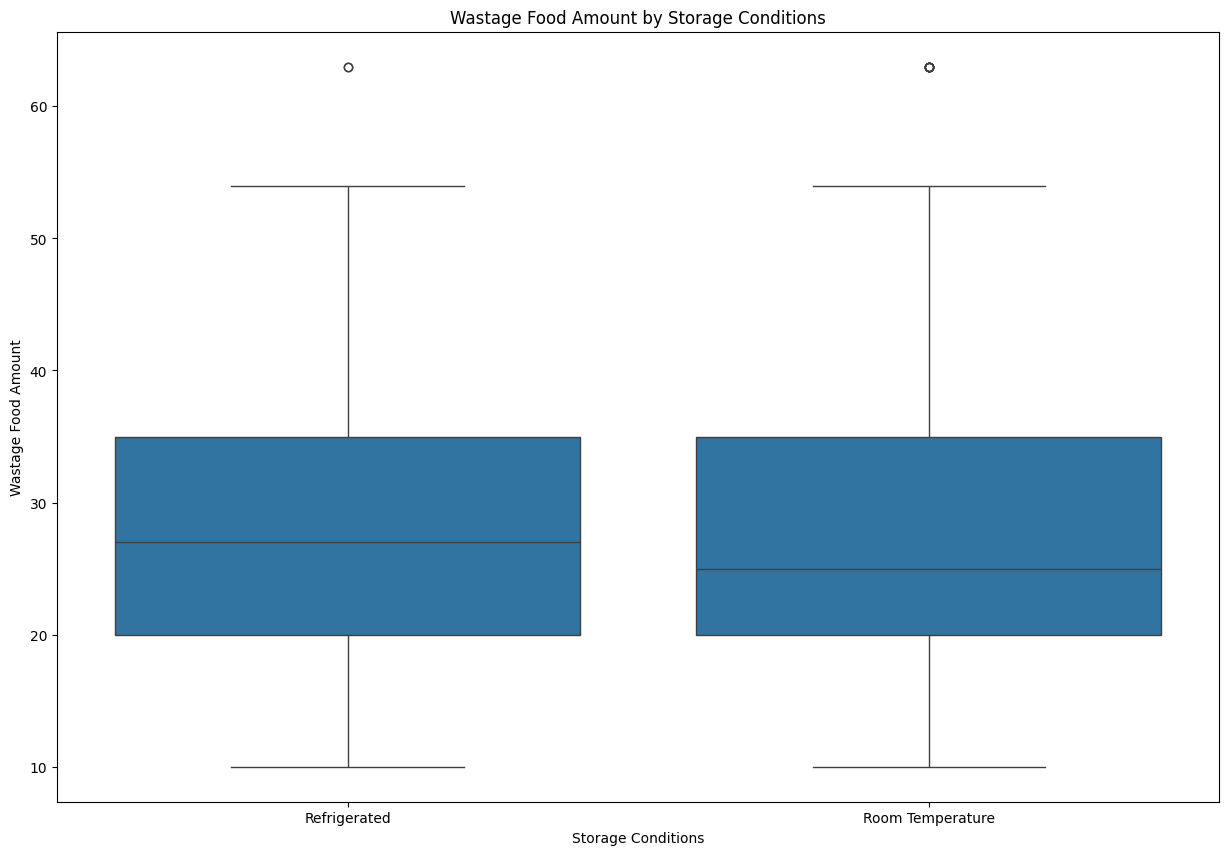

In [12]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Storage Conditions', y='Wastage Food Amount')
plt.title('Wastage Food Amount by Storage Conditions')
plt.show()

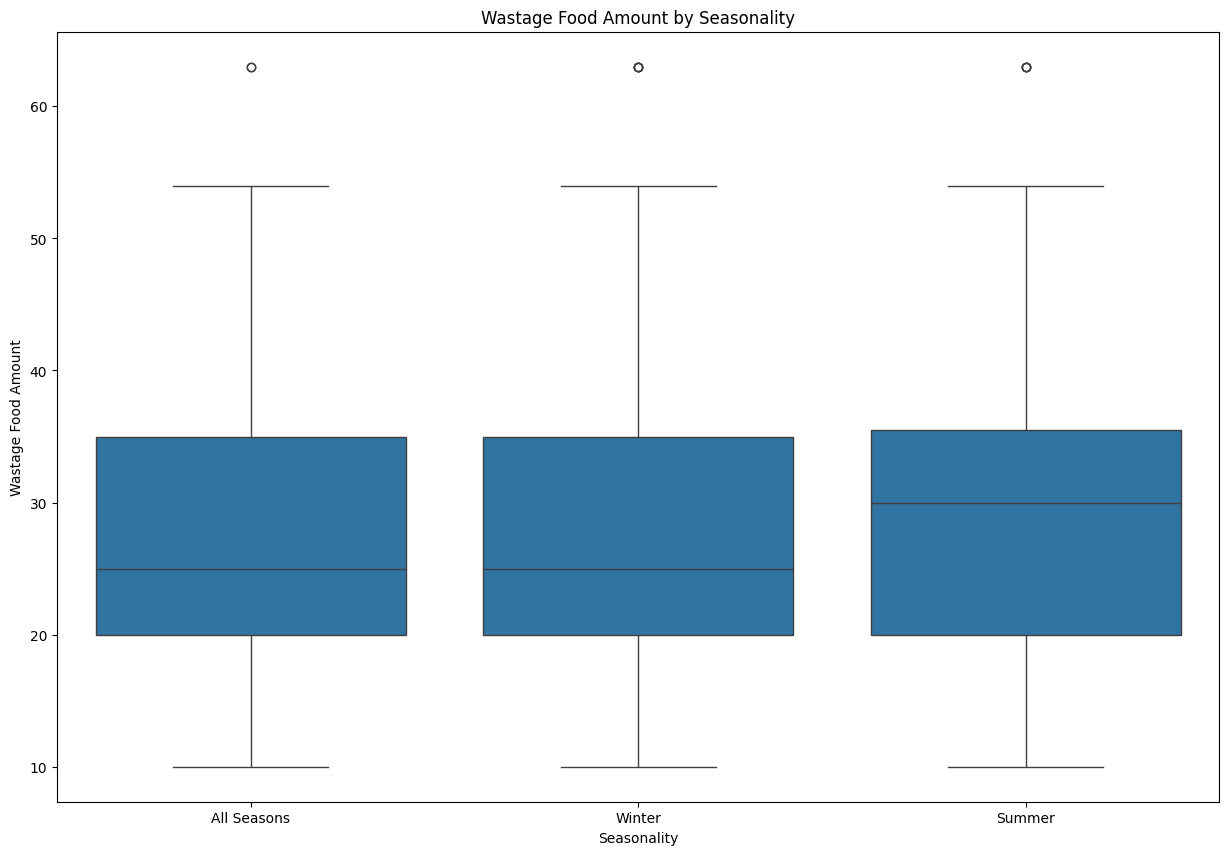

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Seasonality', y='Wastage Food Amount')
plt.title('Wastage Food Amount by Seasonality')
plt.show()

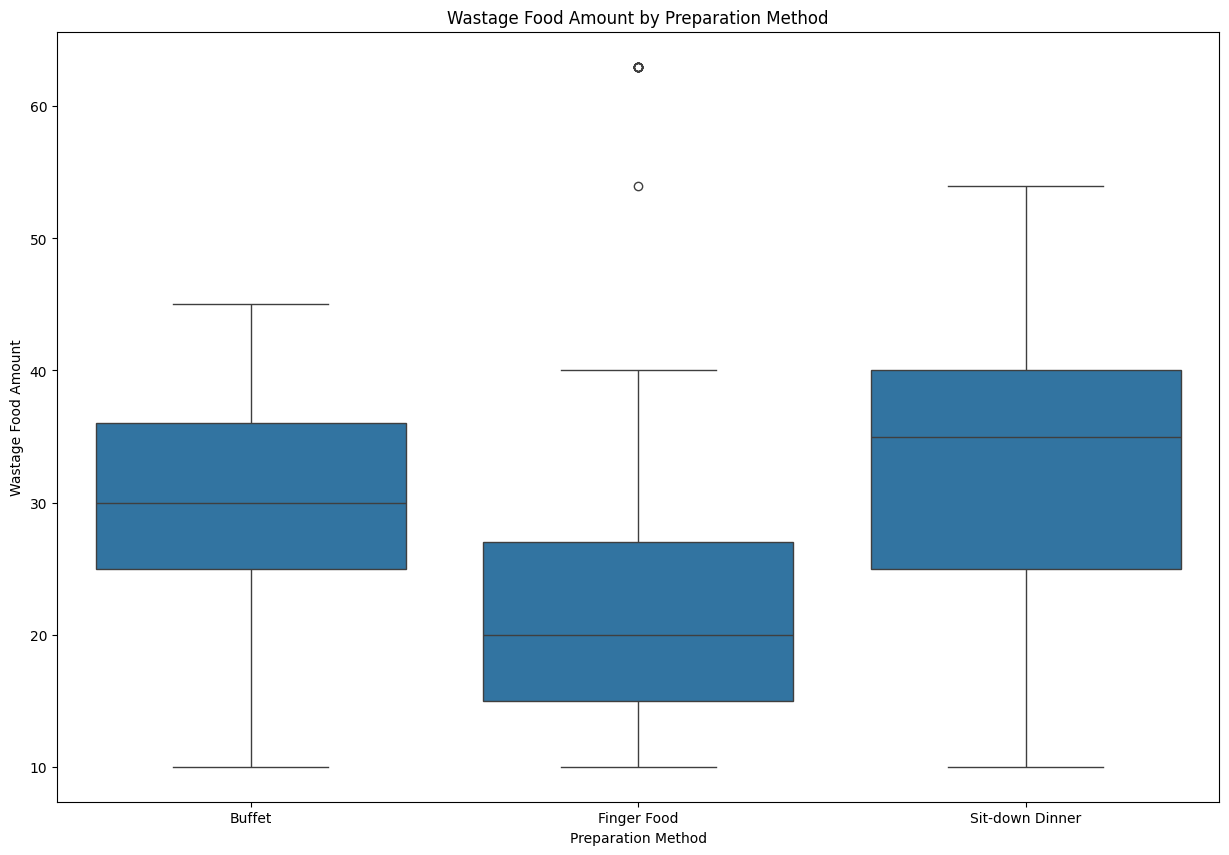

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Preparation Method', y='Wastage Food Amount')
plt.title('Wastage Food Amount by Preparation Method')
plt.show()

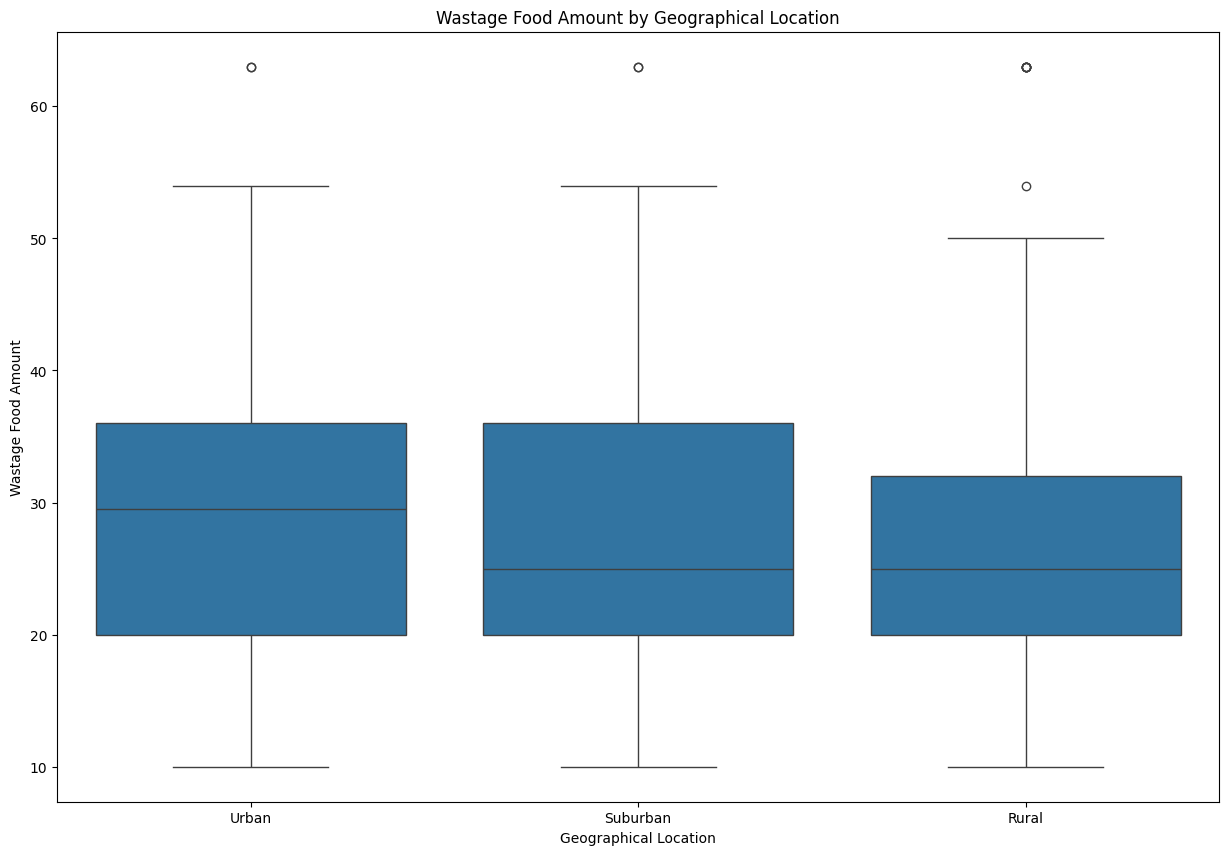

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Geographical Location', y='Wastage Food Amount')
plt.title('Wastage Food Amount by Geographical Location')
plt.show()

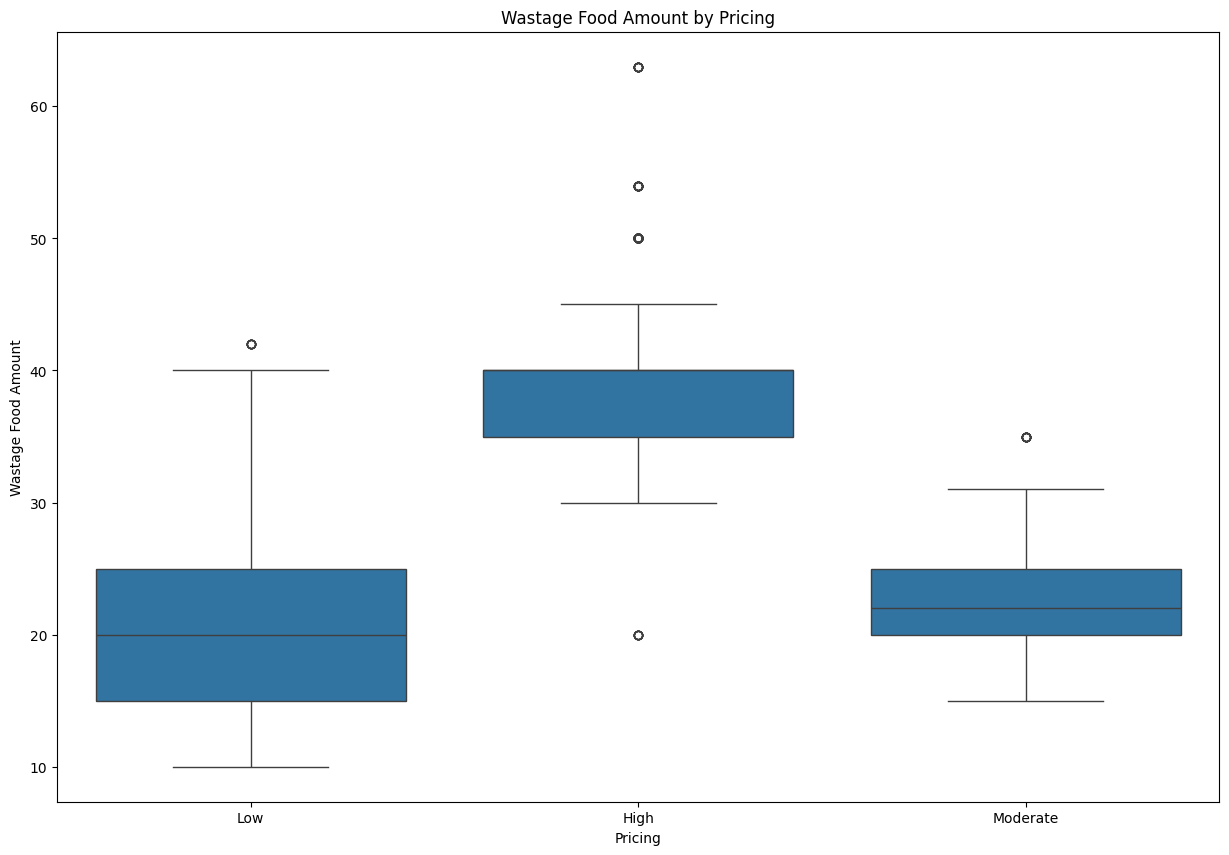

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Pricing', y='Wastage Food Amount')
plt.title('Wastage Food Amount by Pricing')
plt.show()

In [17]:
# Preprocess the Data
# Separate features and target variable
X = data.drop('Wastage Food Amount', axis=1)
y = data['Wastage Food Amount']

In [18]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [19]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

In [20]:
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [21]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [22]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)


In [23]:
# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])


In [24]:
model

RandomForestRegressor(random_state=0)

In [25]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
# Train the Model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Number of Guests', 'Quantity of Food'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Type of Food', 'Event Type', 'Storage Conditions', 'Purchase History',
       'Seasonality', 'Preparation Method', 'Geographical Location',
       'Pricing'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=0))])

In [27]:
# Evaluate the Model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 7.026989535432743


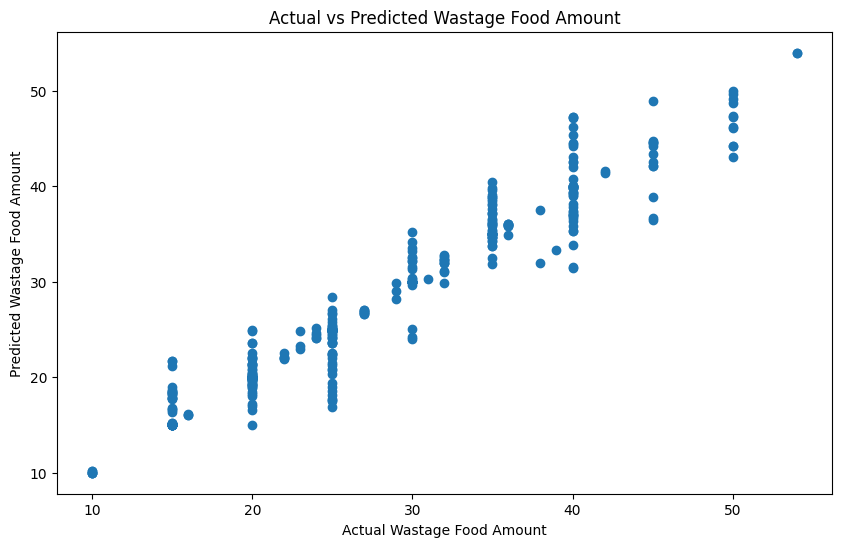

In [28]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wastage Food Amount')
plt.ylabel('Predicted Wastage Food Amount')
plt.title('Actual vs Predicted Wastage Food Amount')
plt.show()

In [35]:
# Evaluate the Model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7.026989535432743
R^2 Score: 0.9273615540821005


In [36]:
import joblib

# Save the model
joblib.dump(pipeline, 'food_wastage_model.pkl')

['food_wastage_model.pkl']